In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy import Symbol, expand
PDEG = 18

#### 1. Data from video ####

In [2]:
#data_file = "../lab_data/video_data/20231128_DSC_1763.txt"
data_file = "../lab_data/video_data/20230621.txt"

vid_data = np.loadtxt(data_file,unpack=True)
N = vid_data.shape[0]-1
tl, xl = np.vsplit(vid_data, [1])
tl = tl.reshape(-1)

poly_xl = [ np.polyfit(tl, x, PDEG) for x in xl ]
fxl = [ (lambda t, px=p: np.polyval(px, t)) for p in poly_xl ]

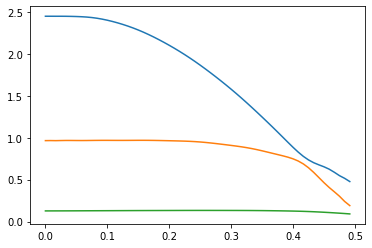

In [3]:
for f in fxl:
    plt.plot(tl, f(tl));

#### 2. Numeric data ####

In [4]:
def rhs2(t, y, k, m, g, N):
    x, v = np.split(y, 2)
    xdot = v
    vdot = np.zeros_like(v)
    vdot[0] = -N*g + k/m * (x[1] - x[0])
    vdot[1:-1] = k/m * (x[2:] - 2*x[1:-1] + x[:-2])
    vdot[-1] = k/m * (x[-2] - x[-1])
    return np.hstack((xdot, vdot))

In [5]:
# Data from our springs and masses
L0 = 0.4639
KK = 0.4399
MM = 56.6E-3
g = 9.81

In [6]:
# Simple run
k = KK * (N - 1)
m = MM
x0 = np.zeros(N)
v0 = np.zeros(N)
y0 = np.hstack((x0, v0))

soluc = solve_ivp(rhs2, [0, tl[-1]], y0, args=[k, m, g, N], max_step=0.01)
tn = soluc.t
xn, vn = (np.vsplit(soluc.y, 2))

poly_xn = [ np.polyfit(tn, x, PDEG) for x in xn ]

# O valor de dt tem que ser ajustado à mão para cada ficheiro
dt = -0.055
fxn = [ (lambda t, px=px: np.polyval(px, t+dt)) for px in poly_xn ]

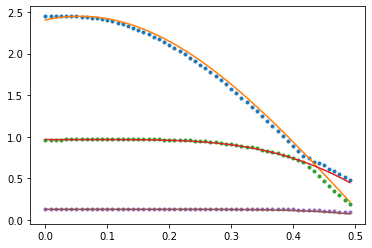

In [7]:

for i,f in enumerate(fxn):
    plt.plot(tl, xl[i],'.', tn, xl[i,0]+f(tn));

#### Aceleração do CM ####

In [8]:
# Cálculo da aceleração do CM
# 1. Posição do CM das bolas
xcml = xl[0].copy()
xcmn = xn[0].copy()
for i in range(1,N):
    xcml += xl[i]
    xcmn += xn[i]
xcml /= N
xcmn /= N

# 2. Aceleração do CM
pacml = np.polyder(np.polyfit(tl, xcml, PDEG), 2)
pacmn = np.polyder(np.polyfit(tn, xcmn, PDEG), 2)

acml = np.polyval(pacml,tl)
acmn = np.polyval(pacmn,tn)

-9.566912713498096


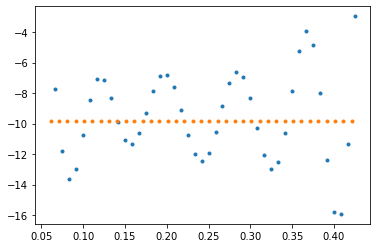

In [9]:
k=8
plt.plot(tl[k:-k],acml[k:-k],'.', tn[k:-k], acmn[k:-k],'.'); 
print(acml[k:-k].sum()/len(acml[k:-k]))

In [10]:
acmn

array([-9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81,
       -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81,
       -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81,
       -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81,
       -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81,
       -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81, -9.81])

In [11]:
x = Symbol('x')
p1 = np.poly1d(poly_xn[0])
print(expand(p1(x)))

-347.806412207337*x**18 + 1559.72918692634*x**17 - 3214.41804807179*x**16 + 4035.72999921262*x**15 - 3449.87519552662*x**14 + 2124.55163807644*x**13 - 971.461379079627*x**12 + 338.103081641824*x**11 - 96.3246172649199*x**10 + 18.2037695479061*x**9 + 10.8954581029844*x**8 + 0.326559006522826*x**7 - 19.7805030164108*x**6 + 0.00171449837561046*x**5 + 19.0609660503516*x**4 + 1.93603718100921e-6*x**3 - 14.7150000297288*x**2 - 1.87358942116485e-10*x + 7.43498884083027e-14


In [12]:
poly_xn[0]

array([-3.47806412e+02,  1.55972919e+03, -3.21441805e+03,  4.03573000e+03,
       -3.44987520e+03,  2.12455164e+03, -9.71461379e+02,  3.38103082e+02,
       -9.63246173e+01,  1.82037695e+01,  1.08954581e+01,  3.26559007e-01,
       -1.97805030e+01,  1.71449838e-03,  1.90609661e+01,  1.93603718e-06,
       -1.47150000e+01, -1.87358942e-10,  7.43498884e-14])